# Importing Libraries

In [1]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Importing Data 

# Loading Train Data

In [2]:
train_data = pd.read_excel('train.xlsx')
train_data.sample(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Classification
1465,0.264620,0.000000,0.000000,0.000000,2
1034,1.852342,1.685102,0.353094,2.896530,2
4104,5424.980153,147.720561,0.434071,7.600298,3
2184,0.529241,0.518656,0.866025,0.960400,2
4048,5396.401164,147.720561,0.431785,7.640549,3


In [3]:
print("Unique Dependent values and their counts :")
print(train_data["Classification"].value_counts())

Unique Dependent values and their counts :
2    3572
1     448
3     339
Name: Classification, dtype: int64


 Here, label 1 is for malignant, 2 for benign and 3 for normal

# Loading Test Data

In [4]:
test_data = pd.read_excel('test.xlsx')
test_data.sample(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Classification
182,12.0,14.812,0.951058,9.141473,2
191,4.0,4.408,0.870424,2.428808,2
379,1.0,0.000,0.000000,0.000000,2
799,1.0,0.000,0.000000,0.000000,2
905,3.0,3.093,0.730297,1.594442,2


In [5]:
print("Unique Dependent values and their counts :")
print(test_data["Classification"].value_counts())

Unique Dependent values and their counts :
2    925
1    113
3     88
Name: Classification, dtype: int64


 Here, label 1 is for malignant, 2 for benign and 3 for normal

# Splitting data for training and testing

# Train Data Split

In [56]:
X_train = train_data.iloc[:,0:4]
y_train = train_data.iloc[:,4]

In [57]:
X_train

,Feature 1,Feature 2,Feature 3,Feature 4
0,2092.087854,23.806033,0.572817,0.511848
1,2921.937020,11.507012,0.690520,0.085625
2,3726.911881,95.744377,0.664582,4.647553
3,2371.526859,90.953427,0.377896,6.591086
4,2900.767399,11.507012,0.690680,0.086250
...,...,...,...,...
4354,5383.699391,147.720561,0.431045,7.658575
4355,5352.474200,147.720561,0.424587,7.703254
4356,5382.640910,147.720561,0.430869,7.660081
4357,5400.370468,147.720561,0.432048,7.634933


In [8]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
4354    3
4355    3
4356    3
4357    3
4358    3
Name: Classification, Length: 4359, dtype: int64

# Test Data Split

In [9]:
X_test = test_data.iloc[:,0:4]
y_test = test_data.iloc[:,4]

In [10]:
X_test

,Feature 1,Feature 2,Feature 3,Feature 4
0,3778.777454,102.557026,0.647744,5.259281
1,3790.949987,152.578725,0.613405,11.603441
2,4138.396401,168.821381,0.659816,13.012769
3,3718.179413,157.625298,0.570126,12.626076
4,1596.983329,54.905795,0.435773,3.566834
...,...,...,...,...
1121,5393.754962,147.720561,0.430699,7.644297
1122,5394.813443,147.720561,0.433569,7.642798
1123,5422.069331,147.720561,0.433508,7.604379
1124,5410.955279,147.720561,0.432639,7.619998


In [11]:
y_test

0       1
1       1
2       1
3       1
4       1
       ..
1121    3
1122    3
1123    3
1124    3
1125    3
Name: Classification, Length: 1126, dtype: int64

# Machine Learning Models

# Decision Tree

In [12]:
from sklearn import tree
start_time = time.time()
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.010977745056152344 seconds


In [13]:
y_pred1 = tree.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 98.49023090586145


Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       113
           2       1.00      0.99      0.99       925
           3       0.87      0.95      0.91        88

    accuracy                           0.98      1126
   macro avg       0.95      0.98      0.96      1126
weighted avg       0.99      0.98      0.99      1126

Confusion Matrix : 


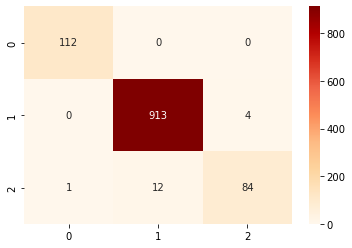

In [15]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.015985790408525755
MSE: 0.017761989342806393
RMSE: 0.13327411355100582


In [17]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.9859425303425414
Recall Score :  0.9849023090586145
f1_score :  0.9852367197590841


# KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.013993978500366211 seconds


In [19]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 99.55595026642983


Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       113
           2       1.00      1.00      1.00       925
           3       0.99      0.95      0.97        88

    accuracy                           1.00      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       1.00      1.00      1.00      1126

Confusion Matrix : 


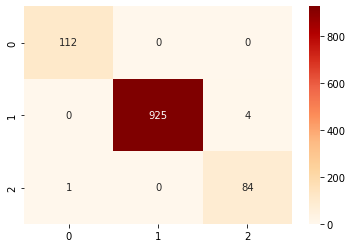

In [21]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.0053285968028419185
MSE: 0.007104795737122558
RMSE: 0.08428995039221793


In [23]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9955434535546979
Recall Score :  0.9955595026642984
f1_score :  0.9955228598323516


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.3393704891204834 seconds


In [25]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 99.55595026642983


Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       113
           2       1.00      1.00      1.00       925
           3       0.99      0.95      0.97        88

    accuracy                           1.00      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       1.00      1.00      1.00      1126

Confusion Matrix : 


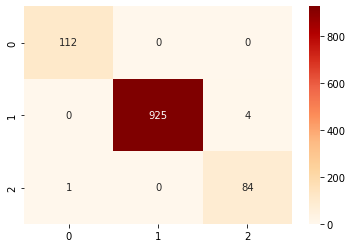

In [27]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.0053285968028419185
MSE: 0.007104795737122558
RMSE: 0.08428995039221793


In [29]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9955434535546979
Recall Score :  0.9955595026642984
f1_score :  0.9955228598323516


# ExtraTreesClassifier

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
start_time = time.time()
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.23606252670288086 seconds


In [31]:
y_pred5 = extratree.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 99.55595026642983


Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       113
           2       1.00      1.00      1.00       925
           3       0.99      0.95      0.97        88

    accuracy                           1.00      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       1.00      1.00      1.00      1126

Confusion Matrix : 


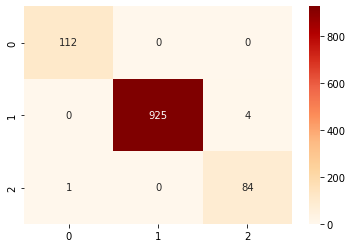

In [33]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.0053285968028419185
MSE: 0.007104795737122558
RMSE: 0.08428995039221793


In [35]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9955434535546979
Recall Score :  0.9955595026642984
f1_score :  0.9955228598323516


# XGBoost

In [36]:
from xgboost import XGBClassifier
start_time = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8060564994812012 seconds


In [37]:
y_pred4 = xgb.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 99.55595026642983


Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       113
           2       1.00      1.00      1.00       925
           3       0.99      0.95      0.97        88

    accuracy                           1.00      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       1.00      1.00      1.00      1126

Confusion Matrix : 


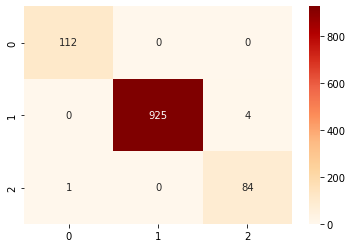

In [39]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.0053285968028419185
MSE: 0.007104795737122558
RMSE: 0.08428995039221793


In [41]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9955434535546979
Recall Score :  0.9955595026642984
f1_score :  0.9955228598323516


# Support Vector Machine

In [42]:
from sklearn import svm
start_time = time.time()
classifier7 = svm.SVC()
classifier7.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.03194117546081543 seconds


In [43]:
y_pred7 = classifier7.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred7)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred7)* 100}")

Accuracy is: 99.55595026642983


Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       113
           2       1.00      1.00      1.00       925
           3       0.99      0.95      0.97        88

    accuracy                           1.00      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       1.00      1.00      1.00      1126

Confusion Matrix : 


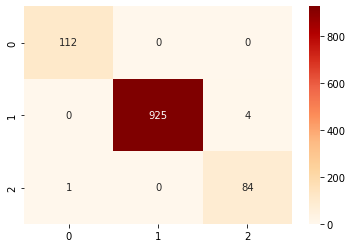

In [45]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred7))

cm = confusion_matrix(y_pred7, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Support Vector Machine

In [46]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred7))
print('MSE:', metrics.mean_squared_error(y_test, y_pred7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred7)))

MAE: 0.0053285968028419185
MSE: 0.007104795737122558
RMSE: 0.08428995039221793


In [47]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred7, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred7,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred7,average='weighted'))

Precision Score :  0.9955434535546979
Recall Score :  0.9955595026642984
f1_score :  0.9955228598323516


# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
classifier6 = LogisticRegression()
classifier6.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.3330988883972168 seconds


C:\Users\nafem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred6 = classifier6.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred6)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred6)* 100}")

Accuracy is: 98.93428063943162


Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96       113
           2       1.00      1.00      1.00       925
           3       0.95      0.95      0.95        88

    accuracy                           0.99      1126
   macro avg       0.97      0.97      0.97      1126
weighted avg       0.99      0.99      0.99      1126

Confusion Matrix : 


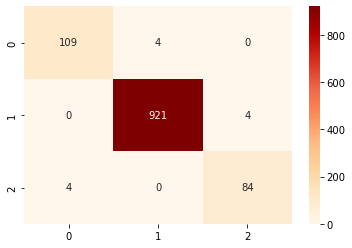

In [51]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred6))

cm = confusion_matrix(y_pred6, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Logistic Regression

In [52]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

MAE: 0.014209591474245116
MSE: 0.021314387211367674
RMSE: 0.14599447664678167


In [53]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred6, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred6,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred6,average='weighted'))

Precision Score :  0.9893428063943162
Recall Score :  0.9893428063943162
f1_score :  0.9893428063943162
